<a href="https://colab.research.google.com/github/tnduss/itb2022/blob/main/classification_sy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분류 (Classification)

In [1]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

##데이터 탐색

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", index_col='허리둘레')

print(health.columns)
display(health.info())
display(health.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Float64Index: 10000 entries, 72.1 to 100.0
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)     

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
허리둘레,,,,,,,,,,,,,,,,,,,,,
72.1,2020,1,36,M,9,165,60,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
81.0,2020,2,27,F,13,150,65,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
70.0,2020,3,11,F,12,155,55,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
90.8,2020,4,31,M,13,160,70,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
75.2,2020,5,41,F,12,155,50,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [7]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,0.933750,0.936750,1.050500,1.045200,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,0.662057,0.641378,0.227936,0.218545,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,0.100000,0.100000,1.000000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,0.700000,0.700000,1.000000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,0.900000,0.900000,1.000000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,1.200000,1.200000,1.000000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,9.900000,9.900000,3.000000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


##의사결정나무 모델

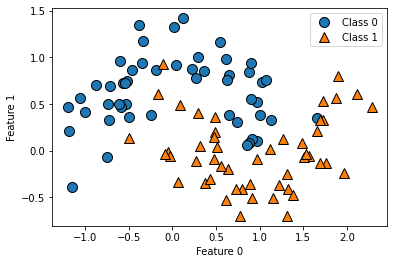

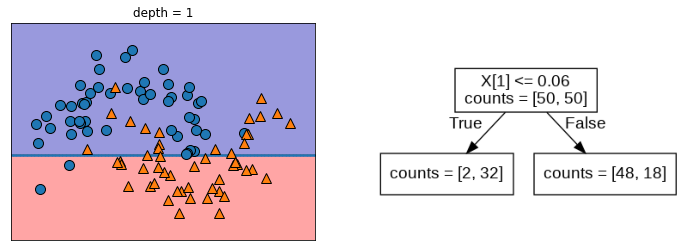

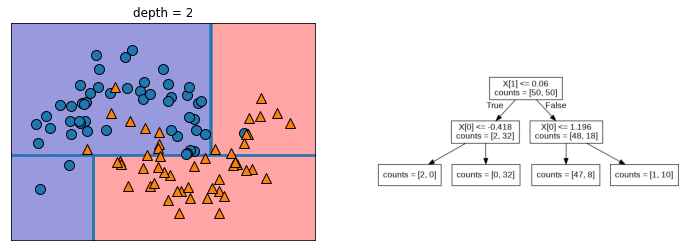

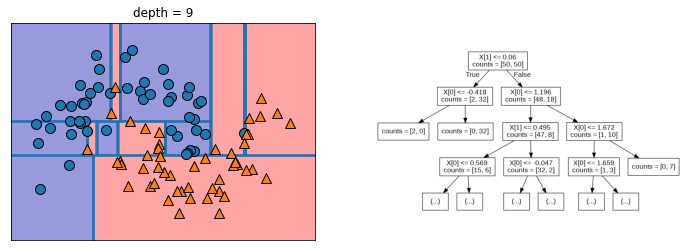

In [8]:
mglearn.plots.plot_tree_progressive()

##DecisionTreeClassifier

In [9]:
from sklearn.preprocessing import LabelEncoder
items=['기준년도','가입자일련번호','시도코드','성별코드','연령대코드(5세단위)','신장(5Cm단위)', '체중(5Kg 단위)', 
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자']
# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [ 7  4 11  9 16 15 22 13 12 21 20 10 19 14 23 26  2  3 27 17 28  1  0  5
 29 18  6 25 24  8]


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
X = health.iloc[:, 1:]
y = health["총콜레스테롤"]

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

ValueError: ignored

In [12]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

ValueError: ignored

In [13]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "양성", "악성"],
                feature_names=health.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

AttributeError: ignored

##주요변수들

In [14]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

AttributeError: ignored

In [15]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health(tree)

AttributeError: ignored

In [16]:
res = pd.DataFrame(result)
res["name"] = health.columns[1:]
display(res.info())

display(res.sort_values(by='name'))  

NameError: ignored